In [52]:
from futils.loaders import *
import matplotlib.pyplot as plt
import scipy.stats
import os
path = "/home/amfaber/cyp_screen/manual_gnina/"
folders = os.listdir("/home/amfaber/cyp_screen/manual_gnina/")
[folder for folder in folders if "(" in folder]
problematic = [folder for folder in folders if len(os.listdir(os.path.join(path, folder))) == 0]

def Linreg(x, y, ax = None, coefpos = (0.8, 0.85), corpos = (0.2, 0.1)):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, ".")
    linreg = scipy.stats.linregress(x, y)
    spearmanr = scipy.stats.mstats.spearmanr(x, y)[0]
    xlims = np.array(ax.get_xlim())
    ys = linreg[0]*xlims+linreg[1]
    ax.plot(xlims, ys)
    txt = "$y=m x + b$\n"
    txt += f"$m = {linreg[0]:.3g}$\n$b = {linreg[1]:.3g}$"
    
    #ax.text(0.87, 0.1, txt, transform = ax.transAxes, ha = "center")

    ax.text(*coefpos, txt, transform = ax.transAxes, va = "center", ha = "center")
    txt = f"pearsons r = {linreg[2]:.3g}\nspearmans r = {spearmanr:.3g}"
    ax.text(*corpos, txt, transform = ax.transAxes, ha = "center")

In [37]:
gni = load_equibind("/home/amfaber/cyp_screen/manual_gnina/", skip = problematic)
gni["name"] = gni["name"].str.replace("_", " ")
glide = pd.read_csv("/home/amfaber/cyp_screen/docking_results.csv")
glide = glide.drop(columns = glide.columns[0])
glide = glide.rename(columns = {"Drug": "name"})
merged = gni.merge(glide, on = "name")

In [38]:
merged

,name,affinity1,affinity2,RMSD,CNNscore,CNNaffinity,CNNvariance,score_1,score_2,score_3,score_5,score_7,score_8
0,Tetrabenazine,-2.00336,-0.29729,7.41452,0.65158,4.03497,0.18651,-4.602,-5.23,-5.479,-4.383,-1.267,-3.200
1,Nitisinone,29.96767,0.53846,6.44875,0.56049,5.42600,0.66031,-3.107,-3.08,-3.959,-3.798,-3.283,-3.484
2,Nomegestrol,95.03537,-0.18871,3.51196,0.00211,2.36995,1.47496,-4.484,NaN,-4.599,-3.631,NaN,NaN
3,Imatinib,-4.41664,-1.18365,8.22274,0.53083,5.62897,0.48705,-5.707,-3.69,-6.049,-3.571,-4.650,-5.084
4,L-Tryptophan,-1.09559,-0.07690,7.22257,0.54440,3.81998,0.24300,-4.901,-4.83,-5.715,-5.553,-4.474,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Quetiapine,-1.84314,1.66565,7.77229,0.65067,4.40506,0.03680,-4.774,-4.72,-5.244,-5.206,-4.578,-4.808
1190,Mepivacaine,-2.10334,-0.40075,3.83043,0.73426,3.81641,0.09754,-5.623,-5.08,-4.290,-4.461,-4.080,-4.092
1191,Mephenytoin,23.42630,-0.19022,6.36487,0.59863,5.47815,0.56615,-4.205,-4.25,-5.667,-4.585,-3.656,NaN
1192,Efinaconazole,-4.54946,-0.45118,5.98186,0.26761,4.60849,0.20007,-6.155,-4.78,-4.515,-4.408,-4.972,-4.059


In [39]:
scores = [f"score_{i}" for i in [1, 2, 3, 5, 7, 8]]

In [43]:
def plot(fig, ax, data, xname, yname):
    x = data[xname]
    y = data[yname]
    Linreg(x, y, ax)
    


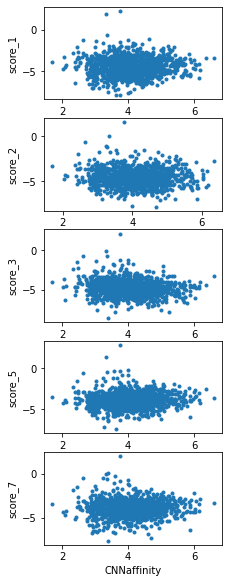

In [51]:
fig, axes = plt.subplots(5, 1, figsize = np.array((16, 9))*0.2*np.array((1, 5.5)))

for i in range(5):
    plot(fig, axes[i], merged, "CNNaffinity", scores[i])

In [ ]:
fig, axes = plt.subplots(5, 1, figsize = np.array((16, 9))*0.2*np.array((1, 5.5)))

for i in range(5):
    plot(fig, axes[i], merged, "CNNaffinity", scores[i])